In [1]:
import os
import numpy as np
import pandas as pd

import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("D:/diabetes.csv")


(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

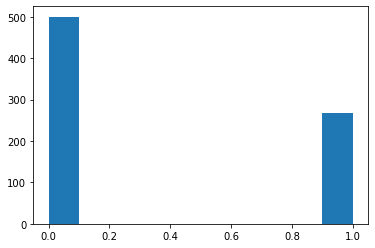

In [3]:
plt.hist(df['Outcome'])

In [4]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8:9]


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)


In [8]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.75260
[1]	validation_0-auc:0.75216
[2]	validation_0-auc:0.76787
[3]	validation_0-auc:0.77604
[4]	validation_0-auc:0.79122
[5]	validation_0-auc:0.79813
[6]	validation_0-auc:0.79265
[7]	validation_0-auc:0.79553
[8]	validation_0-auc:0.79185
[9]	validation_0-auc:0.79364
[10]	validation_0-auc:0.79867
[11]	validation_0-auc:0.80262
[12]	validation_0-auc:0.79239
[13]	validation_0-auc:0.79670
[14]	validation_0-auc:0.80370
[15]	validation_0-auc:0.80352
[16]	validation_0-auc:0.80136
[17]	validation_0-auc:0.79759
[18]	validation_0-auc:0.80154
[19]	validation_0-auc:0.80119
[20]	validation_0-auc:0.80262
[21]	validation_0-auc:0.79831
[22]	validation_0-auc:0.79903
[23]	validation_0-auc:0.80029


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [17]:
model_xgboost.predict(X_valid)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [9]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9325
AUC Valid: 0.8037


In [12]:
learning_rate_list = [0.005,0.01,0.015]
max_depth_list = [2]
n_estimators_list = [500,800, 1000]
gamma = [0,0.2, 0.2]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list,
              "gamma":gamma}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict


27


{'learning_rate': [0.005, 0.01, 0.015],
 'max_depth': [2],
 'n_estimators': [500, 800, 1000],
 'gamma': [0, 0.2, 0.2]}

In [21]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.9,
                                                                colsample_bytree=0.5,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=3,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.803, test=0.742) total time=   0.4s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.814, test=0.766) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.801, test=0.781) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.811, test=0.746) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.820, test=0.754) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.805, test=0.781) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.822, test=0.734) total time=   0.7s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.822, test=0.754) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.807, test=0.777) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.818, test=0.738) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.822, test=0.758) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.807, test=0.781) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.850, test=0.730) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.840, test=0.754) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.816, test=0.789) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.854, test=0.734) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.844, test=0.762) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.838, test=0.785) total time=   0.7s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.844, test=0.734) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.832, test=0.762) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.820, test=0.789) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.867, test=0.727) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.857, test=0.750) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.842, test=0.793) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.871, test=0.730) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.877, test=0.754) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.848, test=0.801) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.803, test=0.742) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.814, test=0.766) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.801, test=0.781) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.811, test=0.746) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.820, test=0.754) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.805, test=0.781) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.822, test=0.734) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.822, test=0.754) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.807, test=0.777) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.818, test=0.734) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.822, test=0.758) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.807, test=0.781) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.850, test=0.730) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.840, test=0.754) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.818, test=0.789) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.854, test=0.730) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.844, test=0.766) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.840, test=0.785) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.846, test=0.734) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.832, test=0.762) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.820, test=0.793) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.861, test=0.727) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.857, test=0.750) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.844, test=0.793) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.871, test=0.730) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.883, test=0.754) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.848, test=0.801) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.803, test=0.742) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.814, test=0.766) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=500;, score=(train=0.801, test=0.781) total time=   0.4s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.811, test=0.746) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.820, test=0.754) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=800;, score=(train=0.805, test=0.781) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.822, test=0.734) total time=   0.7s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.822, test=0.754) total time=   0.7s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.005, max_depth=2, n_estimators=1000;, score=(train=0.807, test=0.777) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.818, test=0.734) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.822, test=0.758) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.807, test=0.781) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.850, test=0.730) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.840, test=0.754) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=0.818, test=0.789) total time=   0.4s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.854, test=0.730) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.844, test=0.766) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.840, test=0.785) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.846, test=0.734) total time=   0.4s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.832, test=0.762) total time=   0.3s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=500;, score=(train=0.820, test=0.793) total time=   0.4s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.861, test=0.727) total time=   0.7s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.857, test=0.750) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=800;, score=(train=0.844, test=0.793) total time=   0.5s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.871, test=0.730) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.883, test=0.754) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END gamma=0.2, learning_rate=0.015, max_depth=2, n_estimators=1000;, score=(train=0.848, test=0.801) total time=   0.6s


C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.9, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             param_grid={'gamma': [0, 0.2, 0.2],
                         'learning_rate': [0.005, 0.01, 0.015],
                         'max_depth': [2], 'n_estimators': [500, 800, 1000]},
             return_train_score=True, verbose=4)

In [35]:
model_xgboost_hp.best_params_

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}

In [36]:
# df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
# df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
#                                'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
# df_cv_results.sort_values(by='rank_test_score', inplace=True)
# df_cv_results

In [37]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.005,
                                          max_depth=2,
                                          gamma=0,
                                          n_estimators=500,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=30,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.62015
[1]	validation_0-auc:0.65041
[2]	validation_0-auc:0.63640
[3]	validation_0-auc:0.61916
[4]	validation_0-auc:0.61288
[5]	validation_0-auc:0.66783
[6]	validation_0-auc:0.70708
[7]	validation_0-auc:0.71489
[8]	validation_0-auc:0.70779
[9]	validation_0-auc:0.71606
[10]	validation_0-auc:0.75341
[11]	validation_0-auc:0.75647
[12]	validation_0-auc:0.75880
[13]	validation_0-auc:0.75826
[14]	validation_0-auc:0.76006
[15]	validation_0-auc:0.75880
[16]	validation_0-auc:0.76293
[17]	validation_0-auc:0.75898
[18]	validation_0-auc:0.76087
[19]	validation_0-auc:0.77371
[20]	validation_0-auc:0.77317
[21]	validation_0-auc:0.77047
[22]	validation_0-auc:0.77137
[23]	validation_0-auc:0.77550
[24]	validation_0-auc:0.77425
[25]	validation_0-auc:0.77748
[26]	validation_0-auc:0.78556
[27]	validation_0-auc:0.78502
[28]	validation_0-auc:0.79616
[29]	validation_0-auc:0.79382
[30]	validation_0-auc:0.79274
[31]	validation_0-auc:0.78951
[32]	validation_0-auc:0.78538
[33]	validation_0-au

C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-auc:0.79023
[45]	validation_0-auc:0.78700
[46]	validation_0-auc:0.78736
[47]	validation_0-auc:0.78646
[48]	validation_0-auc:0.78718
[49]	validation_0-auc:0.79454
[50]	validation_0-auc:0.79490
[51]	validation_0-auc:0.79616
[52]	validation_0-auc:0.79580
[53]	validation_0-auc:0.79562
[54]	validation_0-auc:0.79508
[55]	validation_0-auc:0.79813
[56]	validation_0-auc:0.79652
[57]	validation_0-auc:0.79652
[58]	validation_0-auc:0.79705
[59]	validation_0-auc:0.79634
[60]	validation_0-auc:0.79903
[61]	validation_0-auc:0.79759
[62]	validation_0-auc:0.79795
[63]	validation_0-auc:0.79705
[64]	validation_0-auc:0.79580
[65]	validation_0-auc:0.79993
[66]	validation_0-auc:0.80047
[67]	validation_0-auc:0.80101
[68]	validation_0-auc:0.80226
[69]	validation_0-auc:0.80460
[70]	validation_0-auc:0.80819
[71]	validation_0-auc:0.81017
[72]	validation_0-auc:0.80855
[73]	validation_0-auc:0.80909
[74]	validation_0-auc:0.80765
[75]	validation_0-auc:0.80819
[76]	validation_0-auc:0.80747
[77]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [38]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.8633
AUC Valid: 0.8253


# proper grid search xgboost

In [ ]:
# Dataset
from sklearn import datasets
# Data processing
import pandas as pd
import numpy as np
# Standardize the data
from sklearn.preprocessing import StandardScaler
# Model and performance evaluation
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
# from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [39]:
# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Another grid search

def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.9,
                                                                colsample_bytree=0.5,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=3,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

In [49]:
# Define grid search

grid_search = GridSearchCV(estimator=model_xgboost_fin, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print(f'The best hyperparameters are {grid_result.best_params_}')

C:\Users\moaaz\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


The best score is 0.5286
The best hyperparameters are {'colsample_bytree': 0.5, 'reg_alpha': 0, 'reg_lambda': 0.5}
